In [454]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data Source
The turnstile data was downloaded from http://web.mta.info/developers/turnstile.html

In [455]:
# Filtering turnstile data from stations which we consider important to the study. This can be modified by changing 
#the redhook_station list
from os import listdir
stations = pd.DataFrame()
counter = 0
redhook_station = ['SMITH-9 ST']
for file in listdir('mta_data'):
    filename = 'mta_data/'+file
    if filename.endswith('.txt'):
            if counter == 0:
                stations = pd.read_csv(filename)
                stations = stations[stations['STATION'].isin(redhook_station)]
                counter += 1
            else:
                stations = pd.concat([stations,pd.read_csv(filename)])
                stations = stations[stations['STATION'].isin(redhook_station)]

In [456]:
stations.shape

(13372, 11)

The following image shows the area of study which is Red Hook

<img src="redhook_mta.png">

In [457]:
redhook_station = ['SMITH-9 ST']
# BERGEN ST','CARROLL ST'
redhook_trips = stations[stations['STATION'].isin(redhook_station)]
redhook_trips = redhook_trips[redhook_trips['DESC'] == 'REGULAR']

In [458]:
redhook_trips.shape

(13311, 11)

In [459]:
redhook_trips.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
100510,N536,R270,00-00-00,SMITH-9 ST,FG,IND,04/28/2018,00:00:00,REGULAR,5881,4273
100511,N536,R270,00-00-00,SMITH-9 ST,FG,IND,04/28/2018,04:00:00,REGULAR,5887,4276
100512,N536,R270,00-00-00,SMITH-9 ST,FG,IND,04/28/2018,08:00:00,REGULAR,5904,4284
100513,N536,R270,00-00-00,SMITH-9 ST,FG,IND,04/28/2018,12:00:00,REGULAR,5981,4345
100514,N536,R270,00-00-00,SMITH-9 ST,FG,IND,04/28/2018,16:00:00,REGULAR,6091,4430


## Time Intervals

In [460]:
set(redhook_trips['TIME'])

{'00:00:00',
 '03:00:00',
 '04:00:00',
 '05:05:17',
 '05:06:39',
 '07:00:00',
 '07:39:17',
 '08:00:00',
 '08:09:09',
 '09:00:49',
 '09:09:17',
 '11:00:00',
 '12:00:00',
 '15:00:00',
 '16:00:00',
 '19:00:00',
 '20:00:00',
 '23:00:00'}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

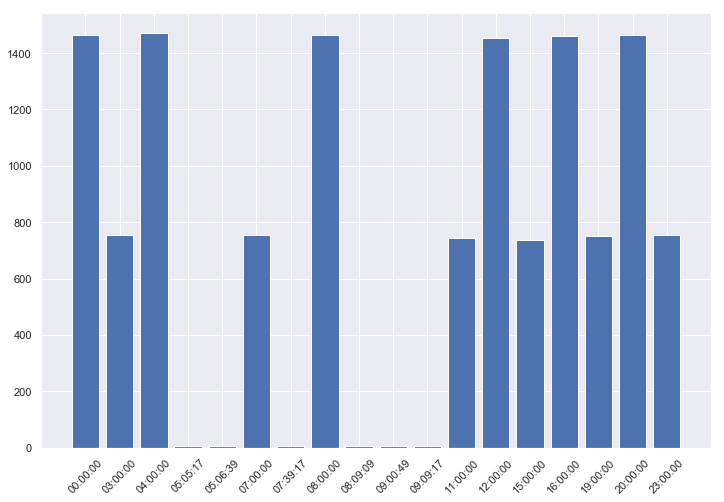

In [461]:
plt.figure(figsize=(12,8))
plt.bar(redhook_trips.groupby('TIME').count().reset_index()['TIME'], redhook_trips.groupby('TIME').count().reset_index()['STATION'])
plt.xticks(rotation=45)

Here we notice that the most common bins occur at 4 hour intervals starting from midnight(0hrs, 4hrs, 8hrs, 12hrs, 16hrs and 20 hrs). There are a few observations that occur at less frequent intervals(3hrs, 7hrs, 11hrs, 15hrs, 19hrs and 23 hrs). There are also a few time intervals which occurred quite rarely. 

I decided to make use of the first interval as they were the most common.

In [462]:
anamolous_times = list(set(redhook_trips.groupby('TIME').count().reset_index()\
[redhook_trips.groupby('TIME').count().reset_index()['STATION']<600]['TIME']))
odd_times = list(set(redhook_trips.groupby('TIME').count().reset_index()\
[redhook_trips.groupby('TIME').count().reset_index()['STATION'].between(600,1400)]['TIME']))
normal_times = list(set(redhook_trips.groupby('TIME').count().reset_index()\
[redhook_trips.groupby('TIME').count().reset_index()['STATION']>1400]['TIME']))
normal_times

['20:00:00', '00:00:00', '12:00:00', '04:00:00', '08:00:00', '16:00:00']

In [463]:
list(set(redhook_trips[redhook_trips['TIME'].isin(anamolous_times)]['DATE']))

['04/10/2019', '04/12/2019', '11/08/2018', '02/26/2019', '05/25/2018']

In [464]:
selected_redhook_trips = redhook_trips[redhook_trips['TIME'].isin(normal_times)]
#odd_redhook_trips = redhook_trips[redhook_trips['TIME'].isin(odd_times)]

In [465]:
#creating a common date_time field by combining date and time
selected_redhook_trips['date_time'] = pd.to_datetime(selected_redhook_trips['DATE'] + ' ' + selected_redhook_trips['TIME'])
#odd_redhook_trips['date_time'] = pd.to_datetime(odd_redhook_trips['DATE'] + ' ' + odd_redhook_trips['TIME'])

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [466]:
selected_redhook_trips.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'date_time'],
      dtype='object')

In [467]:
selected_redhook_trips.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES','EXITS','date_time']
# odd_redhook_trips.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
#        'DESC', 'ENTRIES','EXITS','date_time']

In [468]:
set(selected_redhook_trips['SCP'])

{'00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-05-00', '00-05-01'}

### Data cleaning
Here the entries and exit counts are cumulative. The counter resets and begins counting again at no fixed time or number. For this reason I am taking the difference in counts from the previous time stamps and dropping entries that are less than 0 as that indicates the counter has reset.

In [469]:
selected_redhook_trips_df = selected_redhook_trips.groupby('date_time').sum().reset_index().set_index('date_time').diff().reset_index()

In [470]:
selected_redhook_trips_df.head()

,date_time,ENTRIES,EXITS
0,2018-04-28 00:00:00,NaN,NaN
1,2018-04-28 04:00:00,79.0,142.0
2,2018-04-28 08:00:00,192.0,379.0
3,2018-04-28 12:00:00,703.0,1043.0
4,2018-04-28 16:00:00,945.0,1220.0


In [471]:
selected_redhook_trips_df = selected_redhook_trips_df[selected_redhook_trips_df['EXITS']>0]
selected_redhook_trips_df = selected_redhook_trips_df[selected_redhook_trips_df['ENTRIES']>0]
selected_redhook_trips_df['date_time'] = pd.to_datetime(selected_redhook_trips_df['date_time'])
#selected_redhook_trips_df['date_time'] = pd.to_datetime(selected_redhook_trips_df['date_time_SCP'].apply(lambda x: x.split('__')[1]))
selected_redhook_trips_df.head()

,date_time,ENTRIES,EXITS
1,2018-04-28 04:00:00,79.0,142.0
2,2018-04-28 08:00:00,192.0,379.0
3,2018-04-28 12:00:00,703.0,1043.0
4,2018-04-28 16:00:00,945.0,1220.0
5,2018-04-28 20:00:00,1000.0,1143.0


In [472]:
selected_redhook_trips_df.sort_values(by='EXITS',ascending=False).head()

,date_time,ENTRIES,EXITS
1201,2019-03-21 00:00:00,7390547.0,5546749.0
1137,2019-03-10 04:00:00,491676.0,596170.0
1277,2019-04-02 20:00:00,2540.0,2818.0
1425,2019-04-27 16:00:00,1372.0,2418.0
463,2018-07-14 16:00:00,1687.0,2296.0


We notice here that the first two numbers of the data is unusually high.

In [473]:
anomaly_check_df = redhook_trips[redhook_trips.DATE.isin(['03/22/2019','03/21/2019','03/20/2019'])]
anomaly_check_df['date_time'] = anomaly_check_df['DATE'] + anomaly_check_df['TIME']
anomaly_check_df.groupby('date_time').sum()
#.sort_values(by=['SCP','DATE'])

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ENTRIES,EXITS
date_time,,
03/20/201900:00:00,11907011,10781255
03/20/201904:00:00,11907067,10781323
03/20/201908:00:00,11907673,10782285
03/20/201912:00:00,11908914,10783764
03/20/201916:00:00,4521366,5240501
03/21/201900:00:00,11911913,10787250
03/21/201904:00:00,11911958,10787350
03/21/201908:00:00,11912569,10788286
03/21/201912:00:00,11913802,10789675


Upon investigating the data there is an unusual drop in the counter but then returns to its previous state.

In [474]:
daily_trips = selected_redhook_trips_df.groupby('date_time').sum().reset_index().set_index('date_time').resample('1D').sum().reset_index()

In [475]:
daily_trips.head()

,date_time,ENTRIES,EXITS
0,2018-04-28,2919.0,3927.0
1,2018-04-29,2570.0,2676.0
2,2018-04-30,4675.0,5527.0
3,2018-05-01,4925.0,5775.0
4,2018-05-02,5076.0,6020.0


Text(0.5, 1.0, 'Entry vs exit to find anomalies')

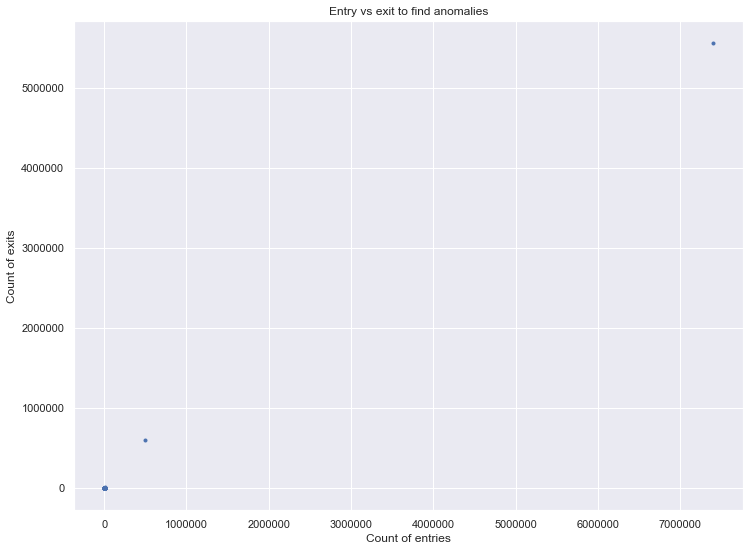

In [476]:
plt.figure(figsize=(12,9))
plt.plot(daily_trips['ENTRIES'],daily_trips['EXITS'],'.')
plt.xlabel('Count of entries')
plt.ylabel('Count of exits')
plt.title("Entry vs exit to find anomalies")

Visualizing the number of entries and exits we see the outilers. I have decided to remove these points and taken those records where number of entries in the past 4 hours is less than 100000.

Text(0.5, 1.0, 'Entry vs exit to find anomalies(Records with less than 100000 entries)')

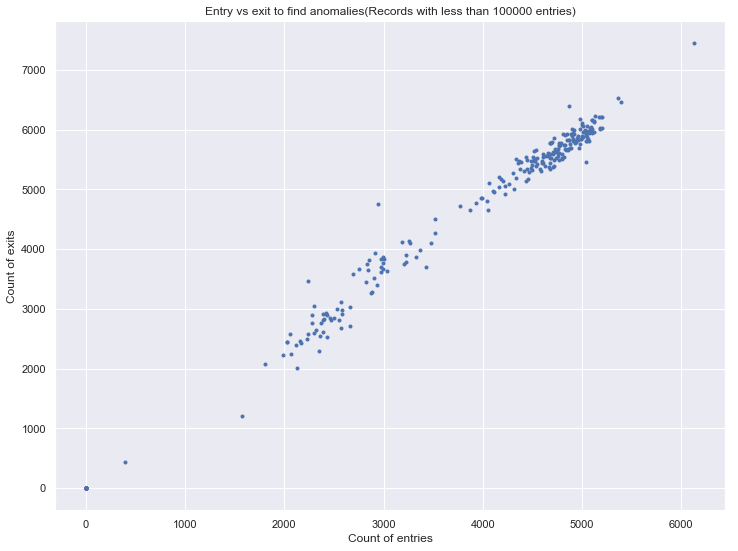

In [477]:
plt.figure(figsize=(12,9))
plt.plot(daily_trips[daily_trips['ENTRIES']<100000]['ENTRIES'],daily_trips[daily_trips['ENTRIES']<100000]['EXITS'],'.')
plt.xlabel('Count of entries')
plt.ylabel('Count of exits')
plt.title("Entry vs exit to find anomalies(Records with less than 100000 entries)")

In [478]:
daily_trips = daily_trips[daily_trips['ENTRIES']<100000]

## Daily trends

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.]),
 <a list of 7 Text xticklabel objects>)

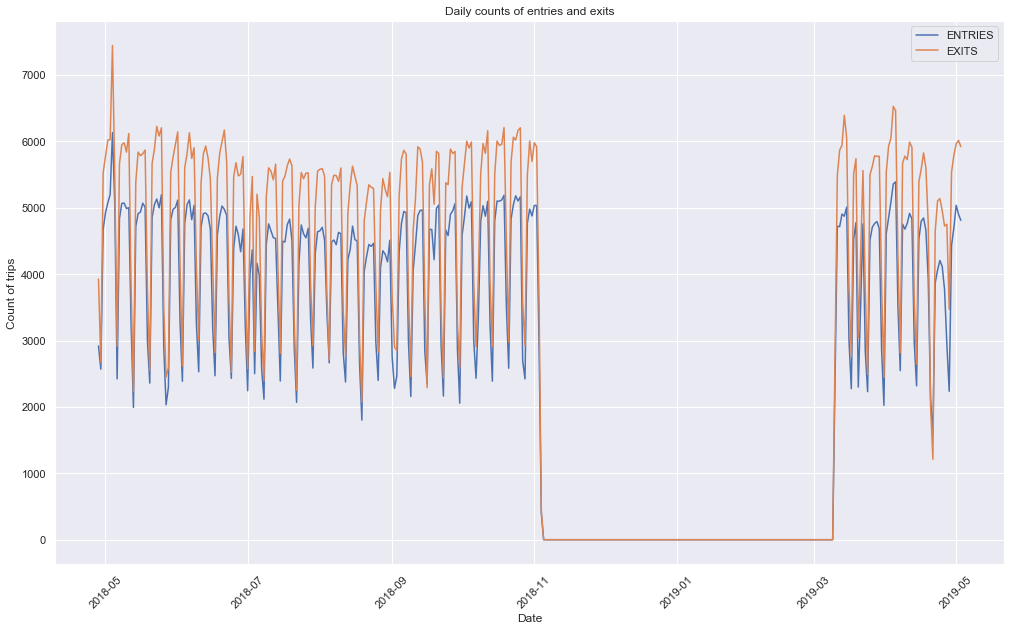

In [479]:
plt.figure(figsize=(17,10))
plt.plot(daily_trips.date_time, daily_trips.ENTRIES)
plt.plot(daily_trips.date_time, daily_trips.EXITS)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of entries and exits")
plt.xticks(rotation='45')

The number of trips leaving redhook is always higher than the number of trips entering. Here we notice the periodic nature of the entries and exits. The drop from late 2018 to early 2019 refers to the period where the system switched to the odd times.

## Day of the week analysis

In [480]:
dow_trips = daily_trips
dow_trips['dow'] = dow_trips.date_time.dt.dayofweek
dow_trips = dow_trips.groupby('dow').mean().reset_index()

([<matplotlib.axis.XTick at 0x19a6592df28>,
 <a list of 7 Text xticklabel objects>)

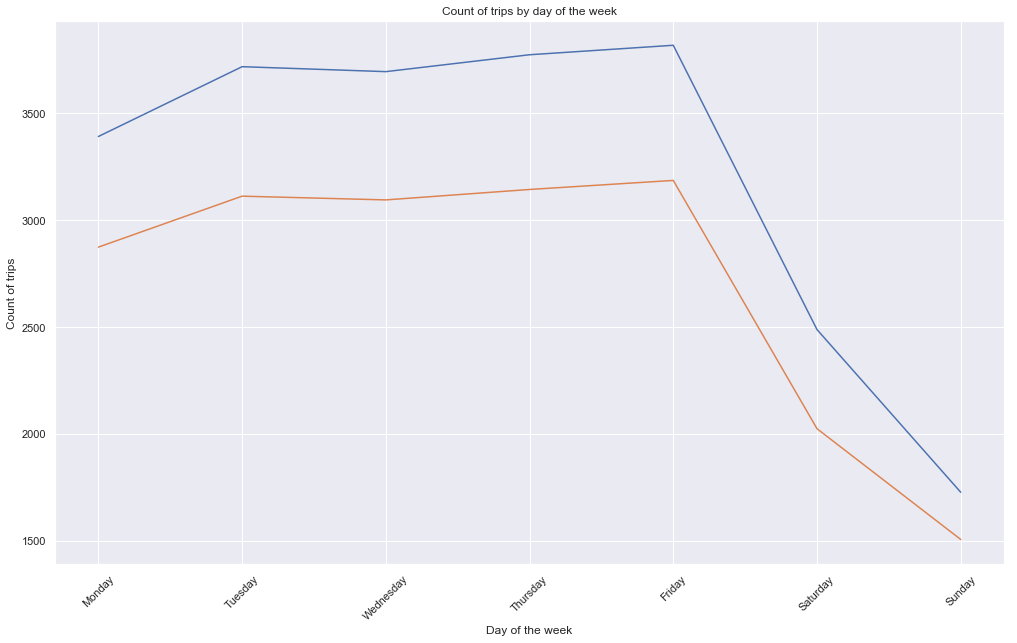

In [481]:
plt.figure(figsize=(17,10))
plt.plot(dow_trips['dow'],dow_trips['EXITS'])
plt.plot(dow_trips['dow'],dow_trips['ENTRIES'])
plt.xlabel('Day of the week')
plt.ylabel('Count of trips')
plt.title("Count of trips by day of the week")
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation = 45)

Here we see the number of entries and exits seems to be high on the weekdays but gets low during the weekend. This could suggest that people usually use the subway when commuting to work.

## Hourly analysis

In [482]:
hourly_trips = selected_redhook_trips_df.groupby('date_time').sum().reset_index()
hourly_trips['hour'] = hourly_trips['date_time'].dt.hour

Text(0.5, 1.0, 'Entry vs exit to find anomalies')

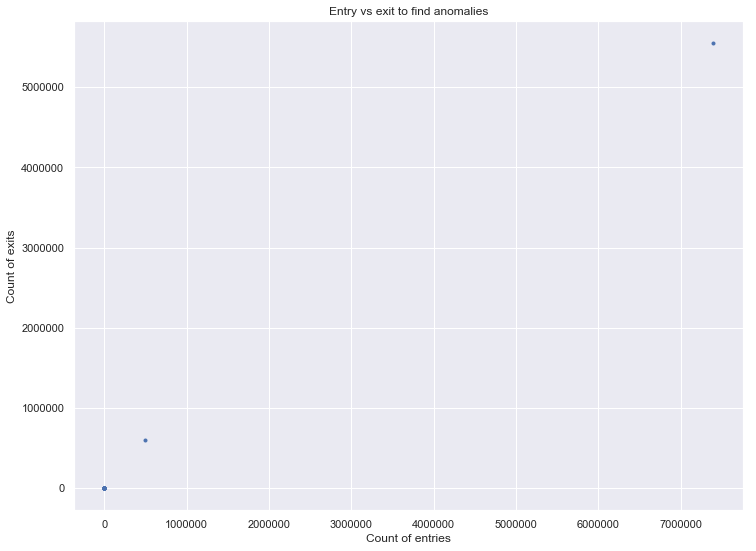

In [483]:
plt.figure(figsize=(12,9))
plt.plot(hourly_trips['ENTRIES'],hourly_trips['EXITS'],'.')
plt.xlabel('Count of entries')
plt.ylabel('Count of exits')
plt.title("Entry vs exit to find anomalies")

Text(0.5, 1.0, 'Entry vs exit to find anomalies(Records with less than 100000 entries)')

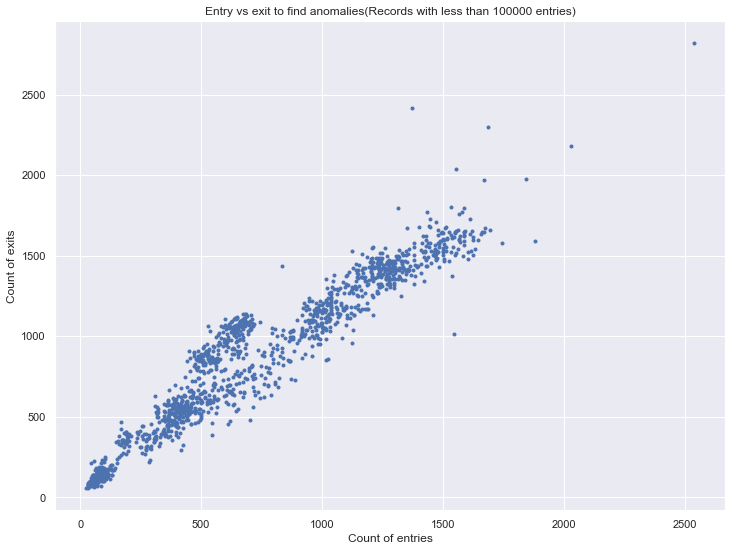

In [484]:
plt.figure(figsize=(12,9))
plt.plot(hourly_trips[hourly_trips['ENTRIES']<100000]['ENTRIES'],hourly_trips[hourly_trips['ENTRIES']<100000]['EXITS'],'.')
plt.xlabel('Count of entries')
plt.ylabel('Count of exits')
plt.title("Entry vs exit to find anomalies(Records with less than 100000 entries)")

In [485]:
hourly_trips = hourly_trips[hourly_trips['ENTRIES']<100000]
hourly_trips = hourly_trips.groupby('hour').mean().reset_index()

([<matplotlib.axis.XTick at 0x19a65584128>,
 <a list of 23 Text xticklabel objects>)

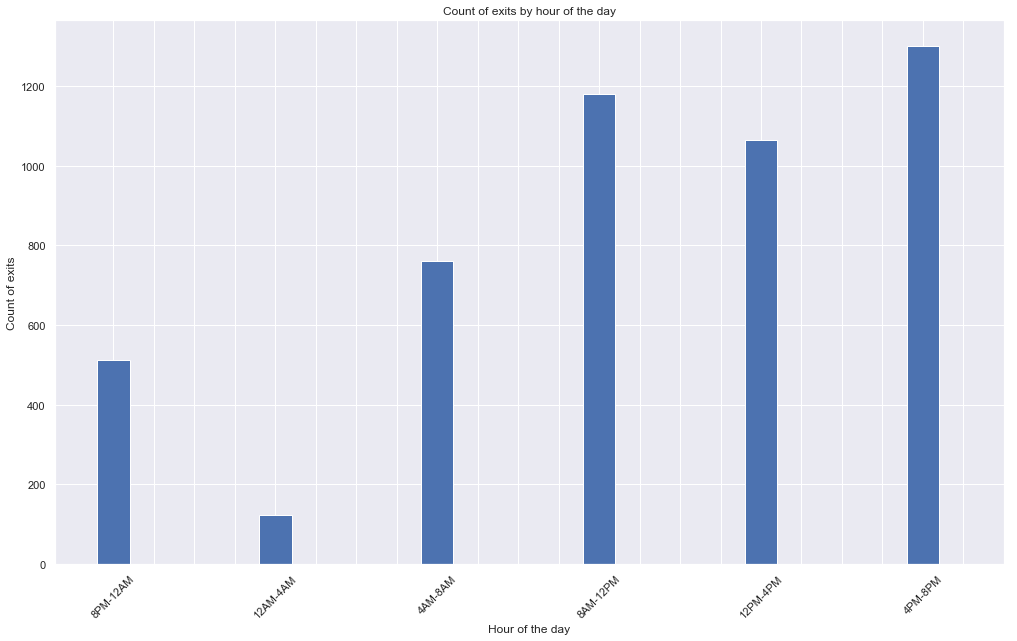

In [486]:
plt.figure(figsize=(17,10))
plt.xlabel('Hour of the day')
plt.ylabel('Count of exits')
plt.title("Count of exits by hour of the day")
plt.bar(hourly_trips['hour'],hourly_trips['EXITS'])
plt.xticks(np.arange(23),('8PM-12AM','','','','12AM-4AM','','','',\
                          '4AM-8AM','','','','8AM-12PM','','','','12PM-4PM','','','','4PM-8PM','','',''),rotation = 45)
#plt.ylim(min(hourly_trips['EXITS'])-100,max(hourly_trips['EXITS'])+100)

([<matplotlib.axis.XTick at 0x19a6549a908>,
 <a list of 23 Text xticklabel objects>)

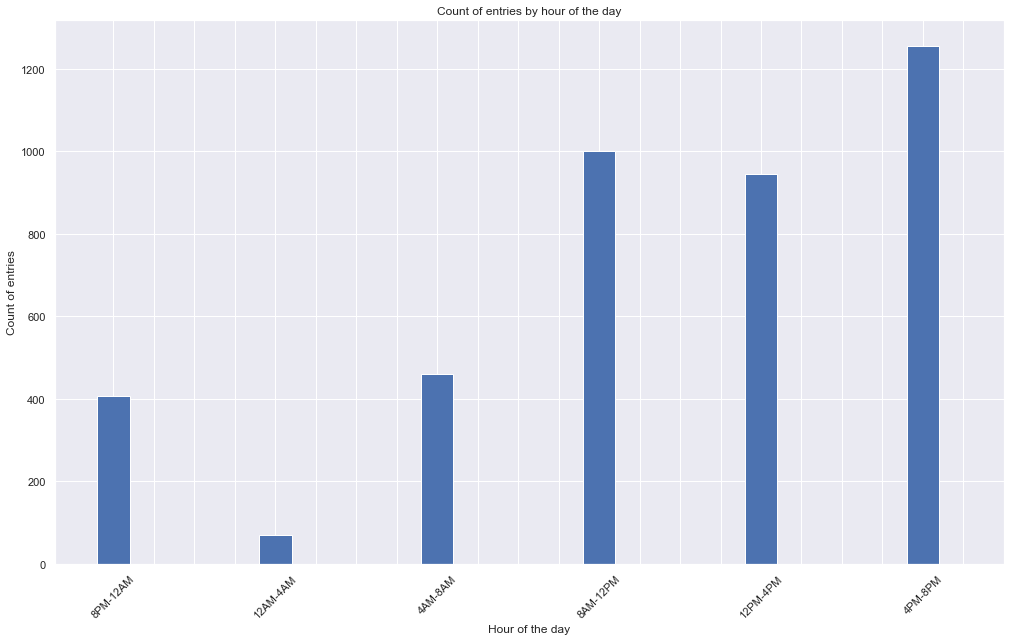

In [487]:
plt.figure(figsize=(17,10))
plt.xlabel('Hour of the day')
plt.ylabel('Count of entries')
plt.title("Count of entries by hour of the day")
plt.bar(hourly_trips['hour'],hourly_trips['ENTRIES'])
plt.xticks(np.arange(23),('8PM-12AM','','','','12AM-4AM','','','',\
                          '4AM-8AM','','','','8AM-12PM','','','','12PM-4PM','','','','4PM-8PM','','',''),rotation = 45)
#plt.ylim(min(hourly_trips['EXITS'])-100,max(hourly_trips['EXITS'])+100)

The hourly trends shows us what we might have expected with high number of trips in the peak office commute hours and low number of trips during late nights.

## Conclusions
Here we see that the peak times for entries and exits at Smith-9 street station occurs during 8AM-12PM and 4PM-8PM. This peak coincides with peaks noticed in the citibike and TLC analysis.